In [2]:
#load female_formal_1.parquet
import polars as pl
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
female_formal_1 = pl.read_parquet('data/female_formal_1.parquet')
female_formal_2 = pl.read_parquet('data/female_formal_2.parquet')

female_informal_1 = pl.read_parquet('data/female_informal_1.parquet')
female_informal_2 = pl.read_parquet('data/female_informal_2.parquet')

male_formal_1 = pl.read_parquet('data/male_formal_1.parquet')
male_formal_2 = pl.read_parquet('data/male_formal_2.parquet')

male_informal_1 = pl.read_parquet('data/male_informal_1.parquet')
male_informal_2 = pl.read_parquet('data/male_informal_2.parquet')

In [4]:
#concat all female dfs
female = pl.concat([female_formal_1, female_formal_2, female_informal_1, female_informal_2])
male = pl.concat([male_formal_1, male_formal_2, male_informal_1, male_informal_2])

In [16]:
informal = pl.concat([female_informal_1, female_informal_2, male_informal_1, male_informal_2])
formal = pl.concat([female_formal_1, female_formal_2, male_formal_1, male_formal_2])

In [17]:
voice_pitch_female = female['pitch_f0_hz']
voice_pitch_male = male['pitch_f0_hz']

voice_pitch_informal = informal['pitch_f0_hz']
voice_pitch_formal = formal['pitch_f0_hz']

voice_pitch_female = voice_pitch_female.to_list()
voice_pitch_male = voice_pitch_male.to_list()

voice_pitch_informal = voice_pitch_informal.to_list()
voice_pitch_formal = voice_pitch_formal.to_list()

In [60]:
female['pitch_f0_hz'].to_list()

[None,
 189.17563247827783,
 225.95985082767422,
 252.8524926366712,
 269.74615020177725,
 None,
 181.49911338289388,
 183.6080314956983,
 179.77565644295606,
 164.235033542002,
 154.98695208650645,
 None,
 None,
 None,
 None,
 None,
 171.76720710153478,
 163.43618968349136,
 192.53777032737452,
 179.30756552314068,
 139.1283625075326,
 159.9676647792401,
 137.9892734552698,
 None,
 None,
 None,
 None,
 150.54058137025655,
 None,
 None,
 None,
 None,
 250.6955946076882,
 None,
 236.2884470573234,
 187.50062572397772,
 None,
 None,
 None,
 None,
 186.89123787854754,
 None,
 151.2376472311154,
 None,
 None,
 None,
 None,
 None,
 199.09482866586305,
 None,
 204.54335806314222,
 205.768465962985,
 205.768465962985,
 180.9560952861027,
 None,
 None,
 None,
 229.23134280425376,
 None,
 None,
 None,
 None,
 None,
 None,
 235.73837076254574,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 273.5726588044943,
 373.37117872462187,
 297.02630315689146,
 218.33633585436164,
 219.34850079490533,
 

In [93]:
#split list into multiple lists on  5x consecutive None values
def split_list(lst, sep = [None, None, None, None, None]):
    start = 0
    for i in range(len(lst)):
        if lst[i:i+len(sep)] == sep:
            yield lst[start:i]
            start = i + len(sep)
    yield lst[start:]

def get_split_list(lst):
    return list(split_list(lst))




In [94]:
#get starting and ending pitch of each list, and make a new list with the difference
def get_diff(voice_pitch_split):
    voice_pitch_diff = []
    for i in voice_pitch_split:
        #remove None values
        i = [x for x in i if x is not None]
        #if list is <2 length, skip
        if len(i) < 4:
            continue
        #get difference between avg of first 2 and avg of last 2 values
        diff = (sum(i[:2]) / 2) - (sum(i[-2:]) / 2)
        voice_pitch_diff.append(diff)
    return voice_pitch_diff



(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 4.,
        7., 1., 2., 3., 2., 2., 3., 1., 2., 1., 1., 1., 1.]),
 array([-249.84321921, -235.33538132, -220.82754344, -206.31970555,
        -191.81186767, -177.30402978, -162.7961919 , -148.28835402,
        -133.78051613, -119.27267825, -104.76484036,  -90.25700248,
         -75.74916459,  -61.24132671,  -46.73348882,  -32.22565094,
         -17.71781306,   -3.20997517,   11.29786271,   25.8057006 ,
          40.31353848,   54.82137637,   69.32921425,   83.83705214,
          98.34489002,  112.85272791,  127.36056579,  141.86840367,
         156.37624156,  170.88407944,  185.39191733]),
 <BarContainer object of 30 artists>)

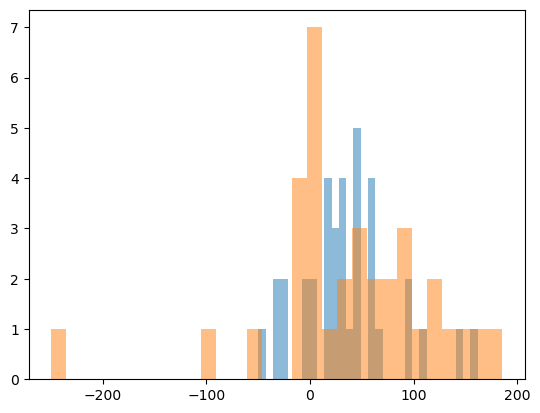

In [95]:
male_diffs = get_diff(get_split_list(voice_pitch_male))
female_diffs = get_diff(get_split_list(voice_pitch_female))

informal_diffs = get_diff(get_split_list(voice_pitch_informal))
formal_diffs = get_diff(get_split_list(voice_pitch_formal))

#compare the two lists
plt.hist(male_diffs, bins=30, alpha=0.5)
plt.hist(female_diffs, bins=30, alpha=0.5)

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1.,
        1., 2., 2., 2., 5., 6., 2., 3., 2., 2., 1., 1., 1.]),
 array([-249.84321921, -236.11744746, -222.39167571, -208.66590396,
        -194.94013221, -181.21436047, -167.48858872, -153.76281697,
        -140.03704522, -126.31127347, -112.58550173,  -98.85972998,
         -85.13395823,  -71.40818648,  -57.68241473,  -43.95664299,
         -30.23087124,  -16.50509949,   -2.77932774,   10.94644401,
          24.67221576,   38.3979875 ,   52.12375925,   65.849531  ,
          79.57530275,   93.3010745 ,  107.02684624,  120.75261799,
         134.47838974,  148.20416149,  161.92993324]),
 <BarContainer object of 30 artists>)

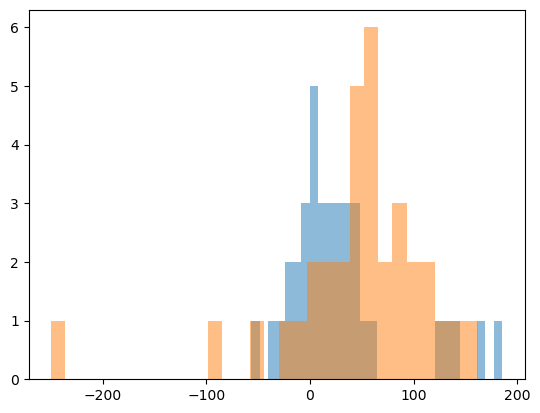

In [96]:
#compare formal and informal
plt.hist(informal_diffs, bins=30, alpha=0.5)
plt.hist(formal_diffs, bins=30, alpha=0.5)

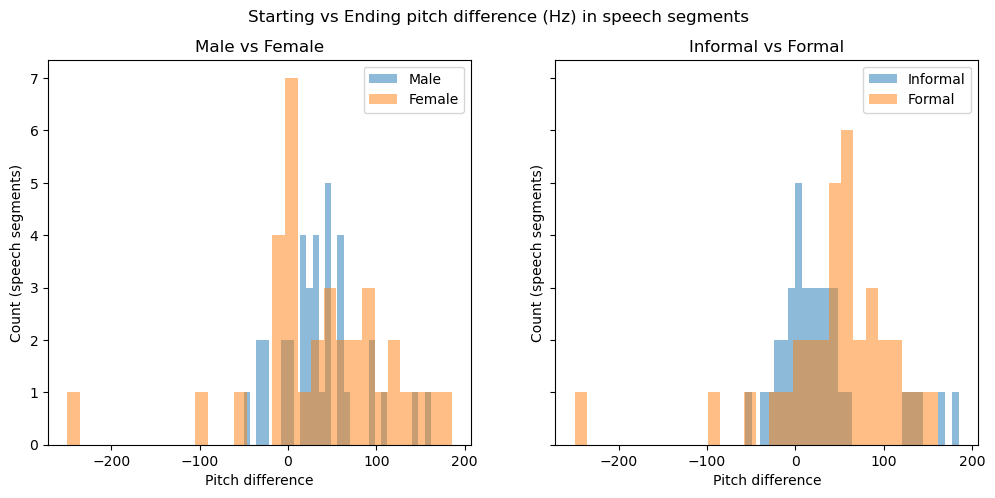

In [107]:
#put the two plots sidebyside
fig, axs = plt.subplots(1, 2, sharey=True,)
#big plot
fig.set_size_inches(12, 5)

axs[0].hist(male_diffs, bins=30, alpha=0.5)
axs[0].hist(female_diffs, bins=30, alpha=0.5)
axs[1].hist(informal_diffs, bins=30, alpha=0.5)
axs[1].hist(formal_diffs, bins=30, alpha=0.5)

#add labels
axs[0].set(xlabel='Pitch difference', ylabel='Count (speech segments)')
axs[1].set(xlabel='Pitch difference', ylabel='Count (speech segments)')

#set title for both plots
axs[0].set_title('Male vs Female')
axs[1].set_title('Informal vs Formal')

#set title for the overall plot
fig.suptitle('Starting vs Ending pitch difference (Hz) in speech segments')


#add legend
axs[0].legend(['Male', 'Female'])
axs[1].legend(['Informal', 'Formal'])


In [97]:
np.mean(male_diffs)

#do t-test of the two lists
from scipy import stats
stats.ttest_ind(male_diffs, female_diffs, equal_var = False)



TtestResult(statistic=-0.29645738943206956, pvalue=0.7680672322710105, df=51.75506964052114)

In [98]:
stats.ttest_ind(informal_diffs, formal_diffs, equal_var = False)

TtestResult(statistic=-1.006417959005555, pvalue=0.3182018729115867, df=60.820577947836306)

In [25]:
#compare mean pitches
pitch_female = [x for x in  voice_pitch_female if x is not None]
pitch_male = [x for x in voice_pitch_male if x is not None]

pitch_informal = [x for x in  voice_pitch_informal if x is not None]
pitch_formal = [x for x in voice_pitch_formal if x is not None]

stats.ttest_ind(pitch_female, pitch_male, equal_var = True)

TtestResult(statistic=20.19678355096043, pvalue=5.603405319150531e-77, df=1058.0)

In [26]:
stats.ttest_ind(pitch_informal, pitch_formal, equal_var = True)

TtestResult(statistic=1.3566963857853622, pvalue=0.175167102772838, df=1058.0)

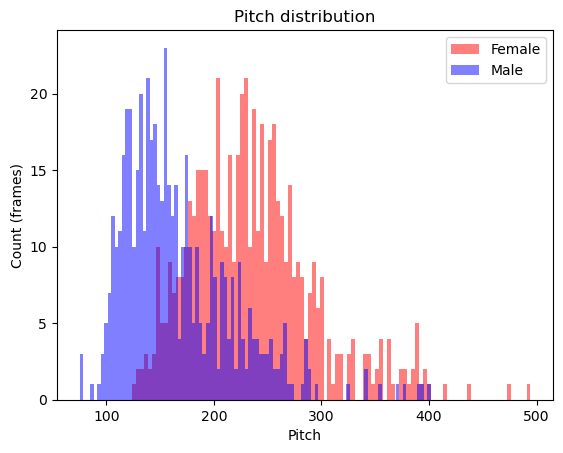

In [61]:
#compare distribution of pitches
plt.hist(pitch_female, bins=100, alpha=0.5, color='red')
plt.hist(pitch_male, bins=100, alpha=0.5, color='blue')

#add title and labels
plt.title('Pitch distribution')
plt.xlabel('Pitch')
plt.ylabel('Count (frames)')

#legend
plt.legend(['Female', 'Male'])


(array([ 4.,  1.,  1.,  2.,  4.,  9., 13.,  6., 14., 11., 15., 16., 13.,
        20., 20., 16., 15., 26., 17., 19., 22., 15., 14., 22., 16., 11.,
        10.,  9.,  8., 14., 18.,  6., 13., 14.,  8., 11.,  8., 11.,  8.,
         4.,  8.,  6.,  7.,  4.,  3.,  4.,  5.,  3.,  2.,  3.,  1.,  1.,
         0.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  2.,  0.,  0.,  0.,  1.,
         0.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  3.,  1.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.]),
 array([105.45520977, 109.34455749, 113.23390521, 117.12325294,
        121.01260066, 124.90194838, 128.7912961 , 132.68064383,
        136.56999155, 140.45933927, 144.34868699, 148.23803472,
        152.12738244, 156.01673016, 159.90607788, 163.79542561,
        167.68477333, 171.57412105, 175.46346877, 179.3528165 ,
        183.24216422, 187.13151194, 191.02085966, 194.91020739,
        198.79955511, 202.68890283, 206.57825055, 

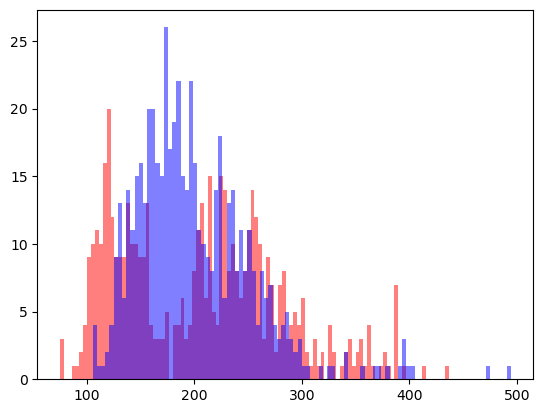

In [28]:
plt.hist(pitch_informal, bins=100, alpha=0.5, color='red')
plt.hist(pitch_formal, bins=100, alpha=0.5, color='blue')

Text(0, 0.5, 'Count (speech segments)')

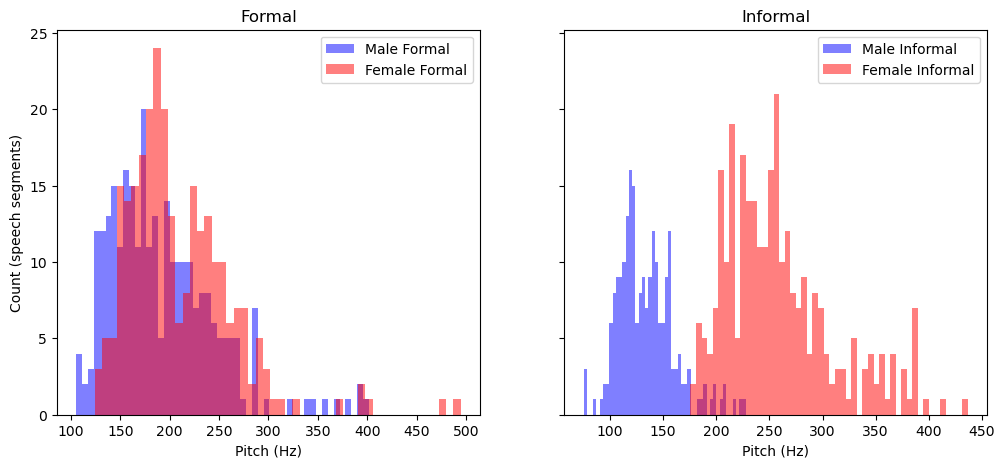

In [55]:
female_formal_pitch = pl.concat([female_formal_1, female_formal_2])['pitch_f0_hz']
male_formal_pitch = pl.concat([male_formal_1, male_formal_2])['pitch_f0_hz']
female_informal_pitch = pl.concat([female_informal_1, female_informal_2])['pitch_f0_hz']
male_informal_pitch = pl.concat([male_informal_1, male_informal_2])['pitch_f0_hz']


#plot 2 plots side by side, 1 for male informal vs female informal, and 1 for male formal vs female formal
fig, axs = plt.subplots(1, 2, sharey=True)
#increase fig size
fig.set_size_inches(12, 5)
axs[0].hist(male_formal_pitch, bins=50, alpha=0.5, color='blue')
axs[0].hist(female_formal_pitch, bins=50, alpha=0.5, color='red')
axs[1].hist(male_informal_pitch, bins=50, alpha=0.5, color='blue')
axs[1].hist(female_informal_pitch, bins=50, alpha=0.5, color='red')

#add subplot titles
axs[0].set_title('Formal')
axs[1].set_title('Informal')

#add legend
axs[0].legend(['Male Formal', 'Female Formal'])
axs[1].legend(['Male Informal', 'Female Informal'])

#add x and y labels
axs[0].set_xlabel('Pitch (Hz)')
axs[1].set_xlabel('Pitch (Hz)')
axs[0].set_ylabel('Count (speech segments)')



Text(0, 0.5, 'Count (speech segments)')

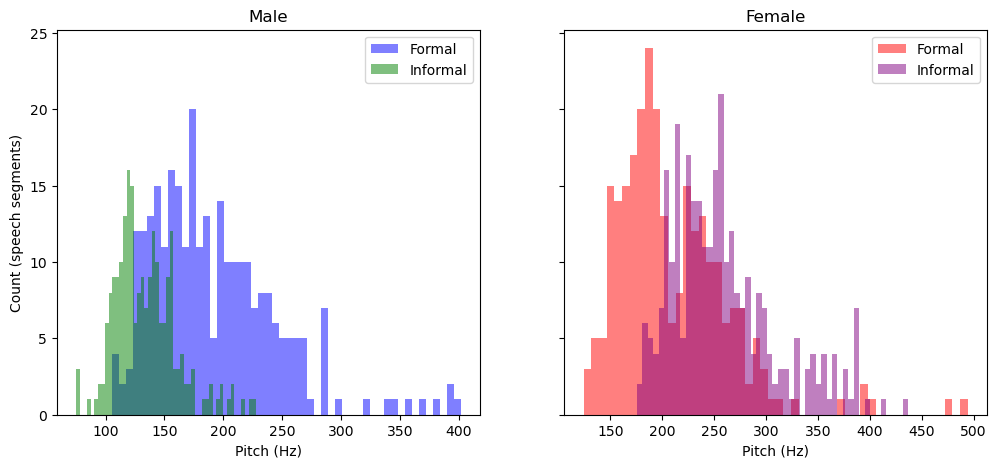

In [56]:
#now the same thing but male formal vs male informal and female formal vs female informal
fig, axs = plt.subplots(1, 2, sharey=True)
#increase fig size
fig.set_size_inches(12, 5)
axs[0].hist(male_formal_pitch, bins=50, alpha=0.5, color='blue')
axs[0].hist(male_informal_pitch, bins=50, alpha=0.5, color='green')
axs[1].hist(female_formal_pitch, bins=50, alpha=0.5, color='red')
axs[1].hist(female_informal_pitch, bins=50, alpha=0.5, color='purple')

#add subplot titles
axs[0].set_title('Male')
axs[1].set_title('Female')

#add legend
axs[0].legend(['Formal', 'Informal'])
axs[1].legend(['Formal', 'Informal'])

#add x and y labels
axs[0].set_xlabel('Pitch (Hz)')
axs[1].set_xlabel('Pitch (Hz)')
axs[0].set_ylabel('Count (speech segments)')


In [50]:
male_informal_pitch = male_informal_pitch.to_list()
female_informal_pitch = female_informal_pitch.to_list()
male_informal_pitch = [x for x in male_informal_pitch if x is not None]
female_informal_pitch = [x for x in female_informal_pitch if x is not None]


In [51]:
#calculate test statistic for male informal vs female informal
stats.ttest_ind(male_informal_pitch, female_informal_pitch, equal_var = False)

TtestResult(statistic=-35.578375950797714, pvalue=4.28319156923871e-134, df=459.46062206034514)